In [2]:
# Import Python modules

from palmerpenguins import load_penguins

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Load the df
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# Count NaN values
nan_counts = penguins.isna().sum()
nan_counts

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
# Remove rows with NaN values
penguins = penguins.dropna()

In [6]:
# Summary statistics
penguins.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


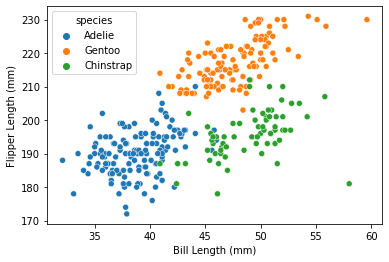

In [7]:
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=penguins)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
#plt.title('Penguins')
plt.show()

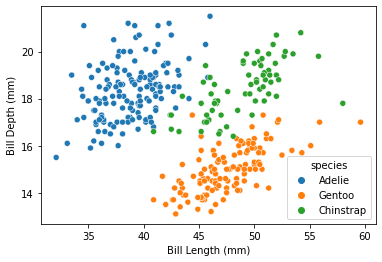

In [8]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
#plt.title('Penguins')
plt.show()

- Data encoding:
    - species.
    - island.
    - sex.

In [9]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'specie' column
penguins['species_encoded'] = le.fit_transform(penguins['species'])

# Display the DataFrame with the new column
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0


In [10]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'island' column
penguins['island_encoded'] = le.fit_transform(penguins['island'])

# Display the DataFrame with the new column
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_encoded,island_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,2
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0,2


In [11]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'sex' column
penguins['sex_encoded'] = le.fit_transform(penguins['sex'])

# Display the DataFrame with the new column
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_encoded,island_encoded,sex_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0,2,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,2,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,2,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,2,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0,2,1


In [12]:
penguins_encoded = penguins.drop(['species', 'island', 'sex'], axis=1)
penguins_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_encoded,island_encoded,sex_encoded
0,39.1,18.7,181.0,3750.0,2007,0,2,1
1,39.5,17.4,186.0,3800.0,2007,0,2,0
2,40.3,18.0,195.0,3250.0,2007,0,2,0
4,36.7,19.3,193.0,3450.0,2007,0,2,0
5,39.3,20.6,190.0,3650.0,2007,0,2,1


#### K-means clustering

In [13]:
# Select variables
x = penguins_encoded[['bill_length_mm', 'bill_depth_mm']]
y = penguins_encoded['species_encoded']


c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


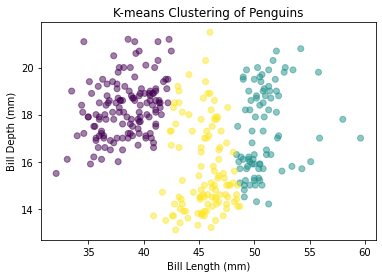

In [14]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

# Predict labels
labels = kmeans.predict(x)
#print(labels)

# Make a scatter plot of x and y using labels to define the colors
plt.scatter(x['bill_length_mm'], x['bill_depth_mm'], c=labels, alpha=0.5)

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('K-means Clustering of Penguins')
plt.show()

In [15]:
# Calculate silhouette score
silhouette_avg = silhouette_score(x, labels)

print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.4844130605148322


In [26]:
# Select variables
x = penguins_encoded[['bill_length_mm', 'flipper_length_mm']]
y = penguins_encoded['species_encoded']

c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


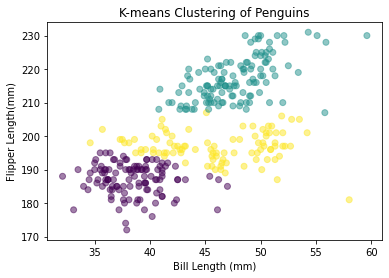

In [27]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3) # 3 species of penguins.
kmeans.fit(x)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

# Predict labels
labels = kmeans.predict(x)
#print(labels)

# Make a scatter plot of x and y using labels to define the colors
plt.scatter(x['bill_length_mm'], x['flipper_length_mm'], c=labels, alpha=0.5)

plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length(mm)')
plt.title('K-means Clustering of Penguins')
plt.show()

In [28]:
# Calculate silhouette score
silhouette_avg = silhouette_score(x, labels)

print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.4795175256517375


Number of Clusters

- Since the penguin dataset comprises 3 species, I grouped the penguins into 3 clusters accordingly.
- When you are uncertain about the number of clusters needed, you can determine it by measuring the inertia.
- Inertia represents the distance from each sample to the centroid of its cluster. The lower the inertia, the better our model performs.
- One method of interpreting the graph below is to employ the elbow method: identify an “elbow” in the inertia plot, where the inertia starts to decrease more slowly.

c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memor

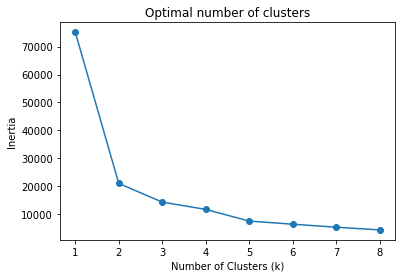

In [30]:
# Number of Clusters

num_clusters = list(range(1,9))
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(x)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Optimal number of clusters')

plt.show()